### 사전준비

In [1]:
# 기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import matplotlib.font_manager as fm
import statsmodels.api as sm # 쓰지는 않는다.
import sklearn as sk

#한글/차트 마이너스 없애기

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

### MNIST 다운로드

In [2]:
from tensorflow import keras
from tensorflow.keras.datasets.mnist import load_data 
from sklearn.model_selection import train_test_split

In [3]:
(train_input, train_target), (test_input, test_target) = load_data()

In [4]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
# MNIST 이미지 표현
def show_images(dataset, label, nrow, ncol):
    # 캔버스 설정
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(2*ncol, 2*nrow))
    ax = axes.ravel()
    
    xlabels = label[0:nrow*ncol]
    
    for i in range(nrow*ncol):
        image = dataset[i]
        ax[i].imshow(image, cmap='gray_r')
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_xlabel(xlabels[i])
    
    plt.tight_layout()
    plt.show()

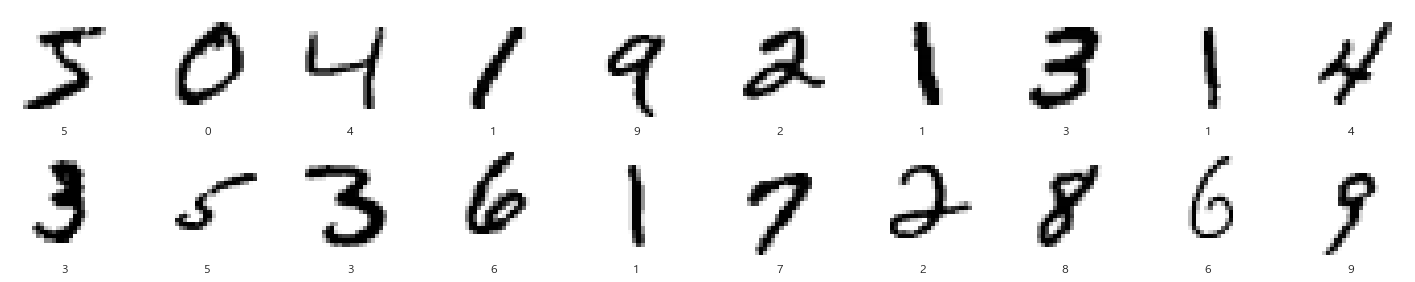

In [6]:
show_images(train_input, train_target, 2, 10)

In [7]:
#model.add(keras.layers.Dropout(0.3))
model = keras.Sequential(name='ANN')
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu', name='hidden'))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))
model.summary()

Model: "ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 255.0 나눠서 0~1로 값 축소하는 일은 하지 않는다
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_ann_model.h5', save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True, verbose=1)
history = model.fit(train_input, train_target, epochs=20, verbose=1, validation_data=(test_input, test_target),
                    batch_size=100, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
591/600 [============================>.] - ETA: 0s - loss: 4.5511 - accuracy: 0.8372
Epoch 1: val_loss improved from inf to 0.76579, saving model to ./data\best_ann_model.h5
600/600 [==============================] - 2s 2ms/step - loss: 4.4956 - accuracy: 0.8376 - val_loss: 0.7658 - val_accuracy: 0.8569
Epoch 2/20
590/600 [============================>.] - ETA: 0s - loss: 0.5684 - accuracy: 0.8833
Epoch 2: val_loss improved from 0.76579 to 0.51512, saving model to ./data\best_ann_model.h5
600/600 [==============================] - 1s 2ms/step - loss: 0.5667 - accuracy: 0.8835 - val_loss: 0.5151 - val_accuracy: 0.8984
Epoch 3/20
596/600 [============================>.] - ETA: 0s - loss: 0.3475 - accuracy: 0.9176
Epoch 3: val_loss improved from 0.51512 to 0.40223, saving model to ./data\best_ann_model.h5
600/600 [==============================] - 1s 2ms/step - loss: 0.3475 - accuracy: 0.9176 - val_loss: 0.4022 - val_accuracy: 0.9153
Epoch 4/20
584/600 [========================

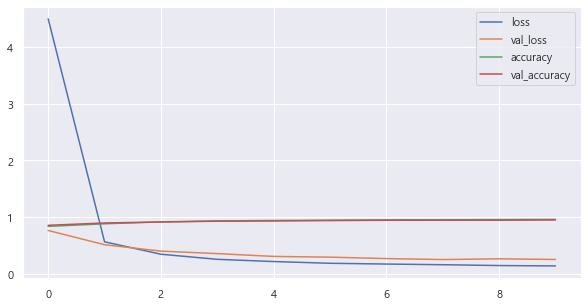

In [9]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(10, 5))

for each in plot_target:
    plt.plot(history.history[each], label=each)
plt.legend()
plt.show()

In [10]:
model.evaluate(test_input, test_target)

313/313 [==============================] - 1s 1ms/step - loss: 0.2537 - accuracy: 0.9473


[0.25372156500816345, 0.9473000168800354]

In [11]:
# 예측된 결과값 리스트
pred_result = model.predict(test_input)

313/313 [==============================] - 0s 1ms/step


In [12]:
pred_labels = np.argmax(pred_result, axis=-1)
pred_labels[:10]
pred_labels.shape

(10000,)

##### 예측 실패한 이미지를 파악한다

In [13]:
wrong_result = []
for i in range(0, len(test_target)):
    if pred_labels[i] != test_target[i]:
        wrong_result.append(i)
    
    
len(wrong_result)

527

In [15]:
import random

samples = random.choices(population=wrong_result, k=16)
len(samples)

16

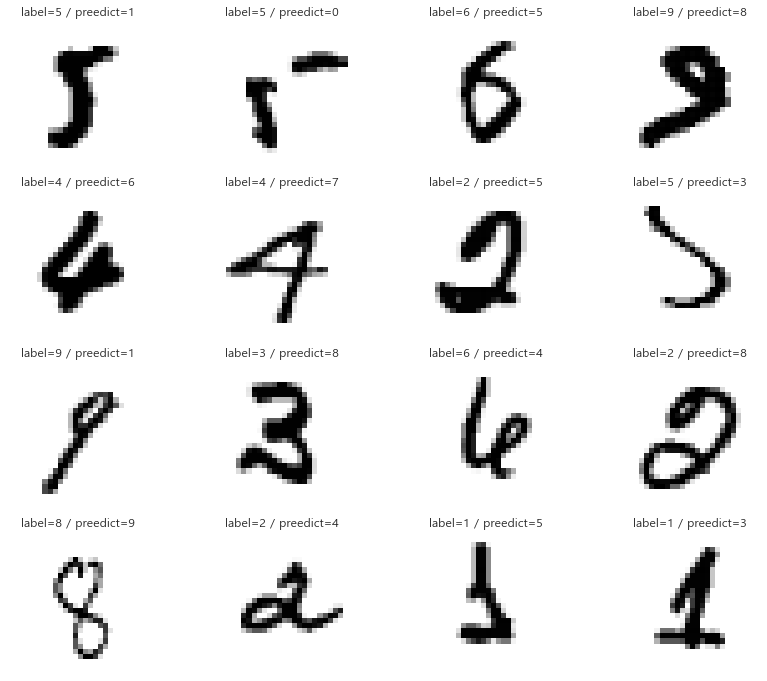

In [19]:
# 예측 실패한 이미지 확인
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(test_input[n].reshape(28, 28), cmap='gray_r', interpolation='nearest')
    plt.title(f'label={test_target[n]} / preedict={pred_labels[n]}')
    plt.axis('off')
    
plt.show()